In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import scripts.utils as utils
import numpy as np


import scripts.utils as utils

def upper_ci(mu, sigma):
    return mu + 1.96 * (sigma / np.sqrt(len(mu)))

def lower_ci(mu, sigma):
    return mu - 1.96 * (sigma / np.sqrt(len(mu)))


path = "/Users/alison/Documents/RAPID/correlation_analysis/code/scripts/"

config = utils.load_config(path)
backcasts = config['config']['backcasts']

plot_kwargs = {'bbox_inches': "tight", 'dpi': 200}

config = utils.load_config("scripts")
indir = config['paths']['resultsdir']
outdir = config['paths']['resultsdir']
figdir = config['paths']['figdir']

ts_dir = os.path.join(outdir, "nf", "full_timeseries")

RZ_ID = 36
buffer = 25
all_ts = glob.glob(os.path.join(ts_dir, f"wrz_{RZ_ID}", "*.parquet"))

eps = []
los = []
dfs = []
for file in all_ts:
    df = pd.read_parquet(file)
    df = df[df['buffer'] == buffer].copy()
    eps.append(df['ep_total'])
    los.append(df['LoS'])
    dfs.append(df)
    
# just take last file, i.e. last ensemble
# df = pd.concat(dfs)
df['Day'] = [1] * len(df)
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

mean_eps = pd.concat(eps, axis=1).mean(axis=1)
se_eps = pd.concat(eps, axis=1).std(axis=1, ddof=0)

<Axes: >

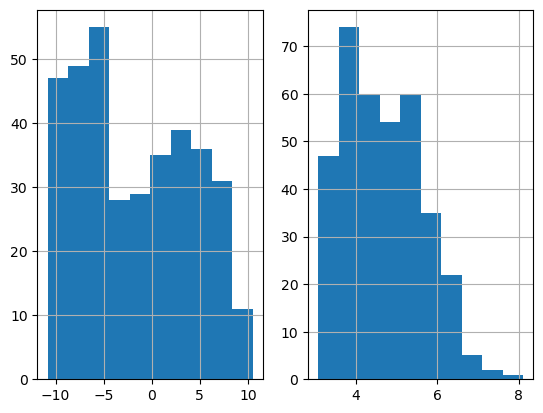

In [2]:
fig, ax = plt.subplots(1, 2)

mean_eps.hist(ax=ax[0])
se_eps.hist(ax=ax[1])

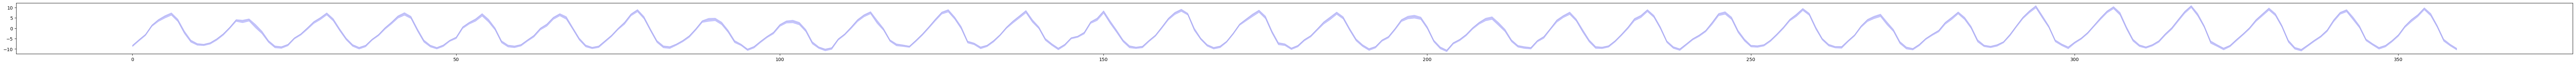

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(100, 2))
x = range(len(mean_eps))

ax.plot(x, mean_eps, linewidth=.1, color='k')
ax.fill_between(x, lower_ci(mean_eps, se_eps), upper_ci(mean_eps, se_eps), color='blue', alpha=0.2)

In [4]:
ts = df.set_index('date')
ts_D = ts.diff(periods=12)
ts

,RZ_ID,Year,Month,LoS,buffer,ep_total,ep_mean,q50_anomaly_total,q75_anomaly_total,q90_anomaly_total,q50_deficit_total,Day
date,,,,,,,,,,,,
2020-01-01,36,2020,1,0.0,25.0,-7.000859,-2.333620,1.985772,-1.432181,-3.793537,0.000000,1
2020-02-01,36,2020,2,0.0,25.0,-10.969042,-3.656347,-4.411514,-7.162153,-8.690109,4.411514,1
2020-03-01,36,2020,3,0.0,25.0,-1.987605,-0.662535,2.003896,-0.530947,-2.677070,0.000000,1
2020-04-01,36,2020,4,0.0,25.0,-0.874780,-0.291593,-1.144219,-3.433624,-6.117130,1.144219,1
2020-05-01,36,2020,5,0.0,25.0,-1.832689,-0.610896,-4.624703,-7.834861,-10.334302,4.624703,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2049-08-01,36,2049,8,0.0,25.0,9.976306,3.325435,5.801597,2.385916,0.160320,0.000000,1
2049-09-01,36,2049,9,0.0,25.0,-0.916282,-0.305427,0.556683,-2.306360,-4.204094,0.000000,1
2049-10-01,36,2049,10,0.0,25.0,0.548581,0.182860,5.732758,2.320355,-0.010902,0.000000,1


DatetimeIndex(['2047-03-01', '2047-04-01', '2047-02-01'], dtype='datetime64[ns]', name='date', freq=None)

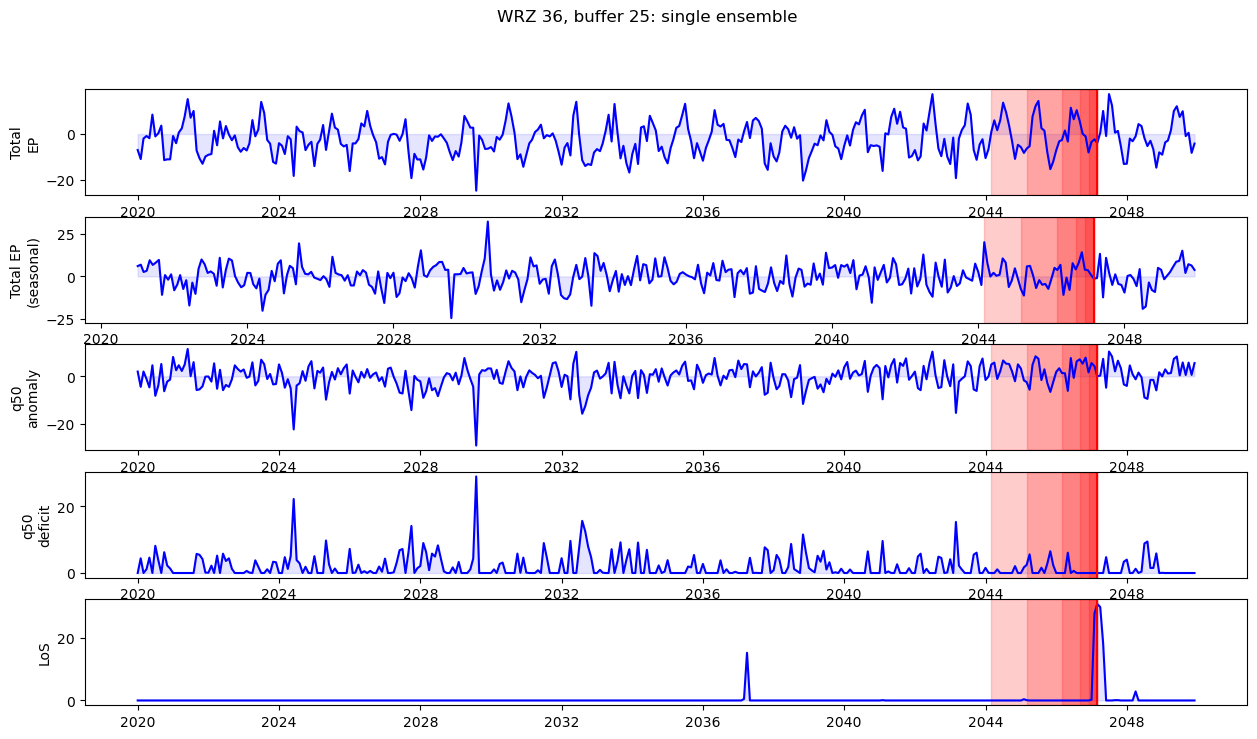

In [14]:
from dateutil.relativedelta import relativedelta

fig, ax = plt.subplots(5, 1, figsize=(15, 8))

ax[0].plot(ts['ep_total'], color='blue')
ax[0].fill_between(ts.index, ts['ep_total'], color='blue', alpha=.1)
ax[0].set_ylabel('Total\nEP')

ax[1].plot(ts_D['ep_total'], color='blue')
ax[1].fill_between(ts_D.index, ts_D['ep_total'], color='blue', alpha=.1)
ax[1].set_ylabel('Total EP\n(seasonal)')

ax[2].plot(ts['q50_anomaly_total'], color='blue')
ax[2].fill_between(ts.index, ts['q50_anomaly_total'], color='blue', alpha=.1)
ax[2].set_ylabel('q50\nanomaly')
# ax[2].set_ylim([-5, 5])

ax[3].plot(ts['q50_deficit_total'], color='blue')
ax[3].fill_between(ts.index, ts['q50_deficit_total'], color='blue', alpha=.1)
ax[3].set_ylabel('q50\ndeficit')
# ax[3].set_ylim([-5, 5])

ax[4].plot(ts['LoS'], color='blue')
ax[4].fill_between(ts.index, ts['LoS'], color='blue', alpha=.1)
ax[4].set_ylabel('LoS')


for a in ax:
    for time in ts.sort_values(by='LoS', ascending=False)[:1].index:
#     time = ts['LoS'].idxmax()
        a.axvline(x=time, color='red')

        for backcast in backcasts:
            start = time - relativedelta(months=backcast)
            a.axvspan(start, time, alpha=0.2, color='red')
        
fig.suptitle(f'WRZ {RZ_ID}, buffer {buffer}: single ensemble')
fig.savefig(os.path.join(figdir, 'timeseries', 'single-ensemble.png'), **plot_kwargs)

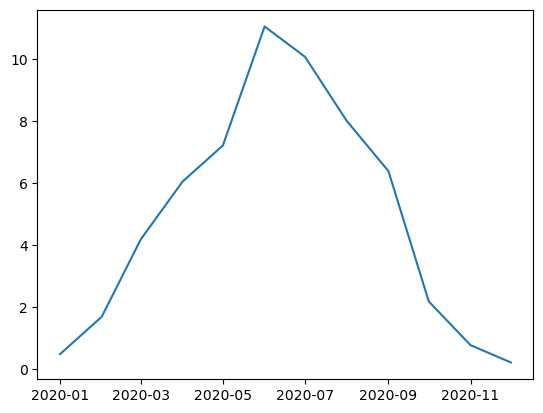

In [100]:
plt.plot(ts[ts['Year'] == 2020]['ep_total'])